In [9]:
#convert the longitudinal blood pressure measurements into a proper time series

import pandas as pd

long_data = pd.read_csv('patient_longitudinal.csv', sep='\t')
long_data['visit_date'] = pd.to_datetime(long_data['visit_date'], format='%Y-%m-%d')

#check for duplicates and remove them and average them 
long_data = long_data.groupby(['patient_id', 'visit_date']).mean().reset_index()

#set visit_data as index 
long_data.set_index('visit_date', inplace=True)

#check for missing values
long_data.isnull().sum()

long_data


,patient_id,bp_systolic,heart_rate,adverse_event,age,sex,bmi,smoking,diabetes
visit_date,,,,,,,,,
2023-01-17,0,111.0,78.7,0.0,57.5,0.0,25.8,0.0,0.0
2023-09-23,0,112.0,79.5,0.0,57.5,0.0,25.8,0.0,0.0
2024-05-22,0,111.2,78.7,0.0,57.5,0.0,25.8,0.0,0.0
2024-12-31,0,109.2,79.5,0.0,57.5,0.0,25.8,0.0,0.0
2023-01-17,1,146.1,78.9,0.0,47.9,0.0,23.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-31,998,136.9,77.1,0.0,41.4,0.0,24.2,0.0,0.0
2023-01-17,999,140.5,96.6,1.0,58.6,0.0,25.6,0.0,0.0
2023-09-23,999,140.2,98.6,0.0,58.6,0.0,25.6,0.0,0.0


In this first part of the problem, i loaded the patient_longitudinal dataset and then added a seperate column named visit_date. I then checked for duplicates and saw that we have 3000 duplicates. I then used aggregation by patient_id calculating the mean numeric columns. I then set the visit_date column as index for time series analysis. I also checked for missing values but there were none. 

/tmp/ipykernel_5409/1605592975.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bp = long_data['bp_systolic'].resample('M').mean()


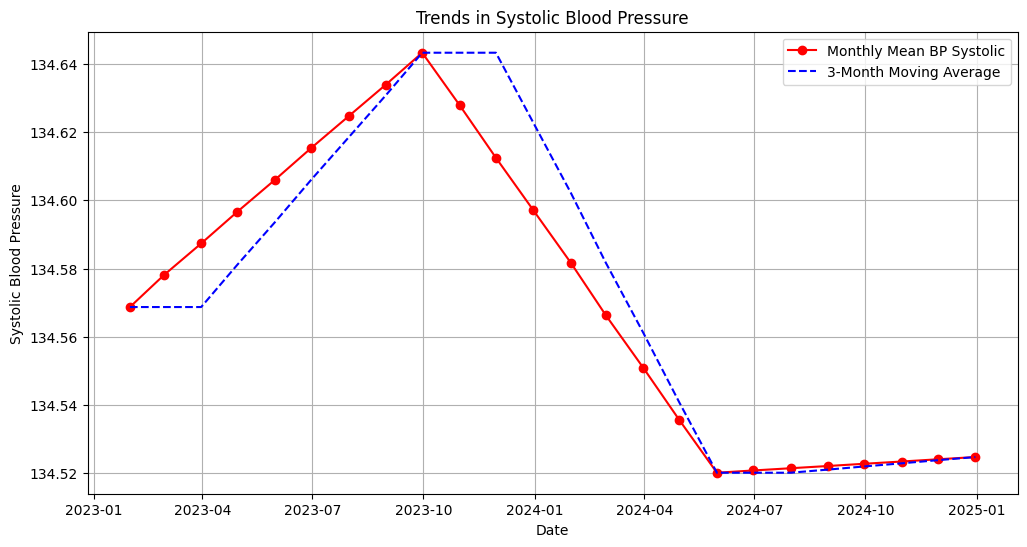

In [11]:
#analyze blood pressure trends 

import matplotlib.pyplot as plt

#month-end frequency 
monthly_bp = long_data['bp_systolic'].resample('M').mean()

#calculate the 3 month moving average
monthly_moving_avg = monthly_bp.rolling(window=3, min_periods=1).mean()

#fill the gaps
monthly_bp = monthly_bp.interpolate()
monthly_moving_avg = monthly_moving_avg.interpolate()

plt.figure(figsize=(12, 6))
plt.plot(monthly_bp, label='Monthly Mean BP Systolic', color='red', marker='o', linestyle='-')
plt.plot(monthly_moving_avg, label='3-Month Moving Average', color='blue', linestyle='--')
plt.title('Trends in Systolic Blood Pressure')
plt.xlabel('Date')
plt.ylabel('Systolic Blood Pressure')
plt.legend()
plt.grid()
plt.show()